In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/MetObjects.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9,10,11,12,13,20,32,33,34,35,36,37,38,39,40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474418 entries, 0 to 474417
Data columns (total 51 columns):
Object Number              474418 non-null object
Is Highlight               474418 non-null bool
Is Timeline Work           474418 non-null bool
Is Public Domain           474418 non-null bool
Object ID                  474418 non-null int64
Department                 474418 non-null object
AccessionYear              470550 non-null object
Object Name                473100 non-null object
Title                      444528 non-null object
Culture                    206251 non-null object
Period                     90354 non-null object
Dynasty                    23143 non-null object
Reign                      11181 non-null object
Portfolio                  23154 non-null object
Artist Role                270457 non-null object
Artist Prefix              89242 non-null object
Artist Display Name        272551 non-null object
Artist Display Bio         233419 non-null object
A

Removing items without tags

In [4]:
df.Tags.isnull().sum()

256010

In [5]:
df.dropna(subset = ["Tags"], inplace = True)
df.Tags.isnull().sum()

0

In [6]:
words_list = '|'.join(df.Tags).split('|')

Get the list of unique words in tags

In [7]:
unique_words = set(words_list)
len(unique_words)

1112

In [8]:
words_count = dict.fromkeys(unique_words, 0)


In [9]:
for word in words_list: 
    words_count[word] += 1

In [10]:
words_count_dict = {k: v for k, v in sorted(words_count.items(), reverse = True, key=lambda item: item[1])}

### What are the top 30 most used tags overall?

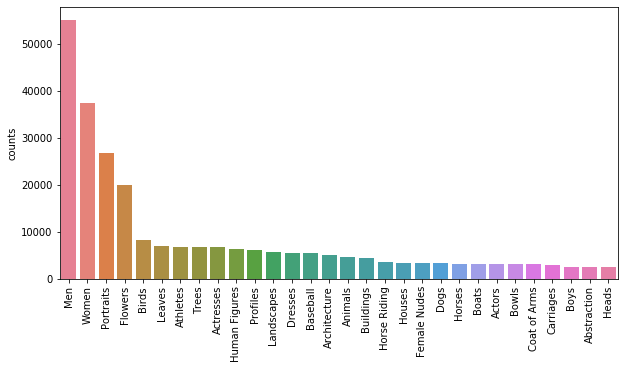

In [11]:
X = list(words_count_dict.keys())[0:30]
Y = list(words_count_dict.values())[0:30]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x=X, y=Y, palette="husl", ax=ax)
ax.set_ylabel("counts")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Let's visualize it as a wordcloud for fun using the wordcloud package.

In [12]:
from wordcloud import WordCloud

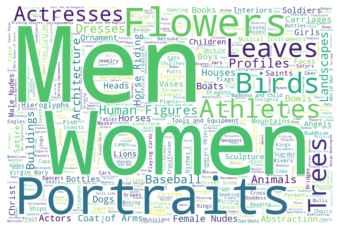

In [13]:
wc = WordCloud(background_color="white", width=1200, height=800, max_words=500)
wc.generate_from_frequencies(words_count_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [96]:
wc.to_file('overall.jpg')

These words seems rather very concrete and descriptive. 
Next, let's see if there's any difference in tagging for artworks with tag 'abstraction'

In [14]:
abstract_words_list = df.Tags[df.Tags.apply(lambda x: 'Abstraction' in x)]
len(abstract_words_list)

2590

In [15]:
abstract_words_list = '|'.join(abstract_words_list).split('|')

In [16]:
abstract_words_list = list(filter(lambda x: x != 'Abstraction', abstract_words_list))
len(abstract_words_list)

139

Unfortunately, it seems like the tag 'Abstraction' is rarely paired with other tags. 


In [19]:
ab_unique_words = set(abstract_words_list)
len(ab_unique_words)

63

Let's still look at what are these words.

In [20]:
ab_words_count = dict.fromkeys(ab_unique_words, 0)
for word in abstract_words_list: 
    ab_words_count[word] += 1

In [21]:
ab_words_count_dict = {k: v for k, v in sorted(ab_words_count.items(), reverse = True, key=lambda item: item[1])}

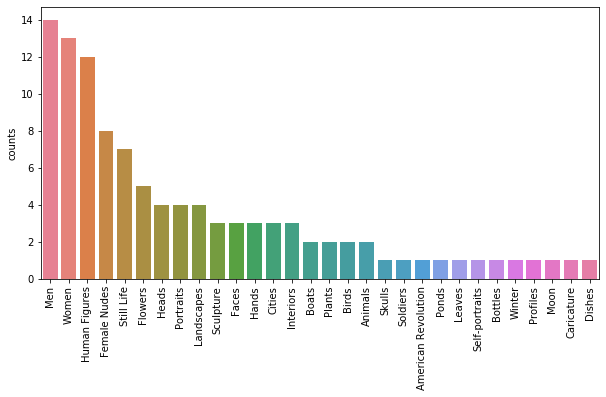

In [22]:
X = list(ab_words_count_dict.keys())[0:30]
Y = list(ab_words_count_dict.values())[0:30]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x=X, y=Y, palette="husl", ax=ax)
ax.set_ylabel("counts")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

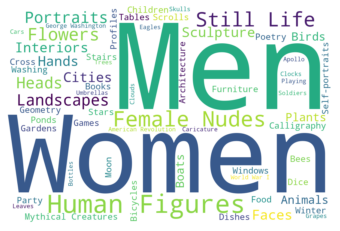

In [120]:
wc2 = WordCloud(background_color="white", width=1200, height=800, max_words=500)
wc2.generate_from_frequencies(ab_words_count_dict)

# show
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()


This alone doesn't say much. How about any other features?

In [26]:
# adding a column that calls true if the tag includes 'Abstraction'
df['abstract'] = df.Tags.apply(lambda x: 'Abstraction' in x)

In [29]:
df[df['abstract']].iloc[0]

Object Number                                                     1984.452.2
Is Highlight                                                           False
Is Timeline Work                                                       False
Is Public Domain                                                       False
Object ID                                                              11811
Department                                                 The American Wing
AccessionYear                                                           1984
Object Name                                                          Drawing
Title                                                           On the Beach
Culture                                                             American
Period                                                                   NaN
Dynasty                                                                  NaN
Reign                                                                    NaN

In [90]:
# round it to nearest 50s
df['object_begin_date_bin'] = (round(df['Object Begin Date']/10)*10).astype('int64')

In [91]:
abs_percent = df.groupby('object_begin_date_bin').abstract.value_counts(normalize = True)

In [92]:
# percentage of abstract items
abs_percent[:, 1] 


object_begin_date_bin
0       0.005722
1500    0.000254
1600    0.000574
1650    0.001310
1700    0.000101
1740    0.000268
1750    0.000408
1820    0.000580
1830    0.000668
1840    0.000623
1880    0.000777
1890    0.000676
1900    0.008410
1910    0.010608
1920    0.034073
1930    0.016928
1940    0.043857
1950    0.096918
1960    0.099237
1970    0.091857
1980    0.150077
1990    0.179832
2000    0.231913
2010    0.274510
2020    0.396040
Name: abstract, dtype: float64

In [93]:
Y = abs_percent[:, 1]
X = Y.index

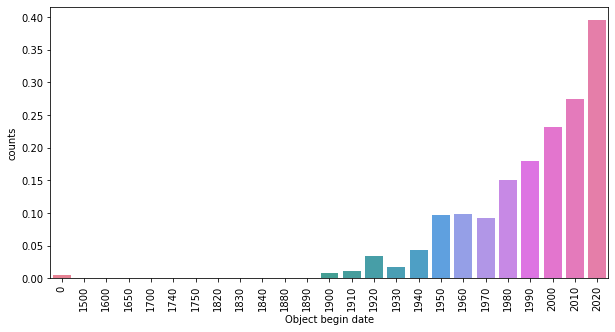

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x=X, y=Y, palette="husl", ax=ax)
ax.set_ylabel("counts")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Object begin date')
plt.show()

Abstract art seems to have started around 1900 and rapidly increased, and not nearly half of the objects at MET created these days are deemed abstract. Given how there isn't many occurrences where abstraction is paired with other words, this tagging system did not seem to have developed a system for categorizing abstraction any further. (Why is that?) It still does not answer the question of how our language understand abstraction has changed. 

Maybe we need to look more into how these 'abstract' art is described.